# Анализ trashnet_enhanced

# Установка Dataset - trashnet_enhanced

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("edwinpalegre/trashnet_enhanced")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

## Данные о структуре dataset

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 19892
    })
})


* Dataset состоит из единственного блока "Train"
* содержит 19892 строк
* каждая строка является размеченной картинкой

## Примеры данных в dataset

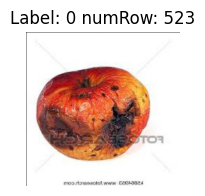

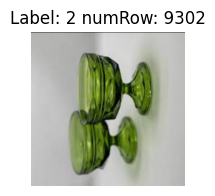

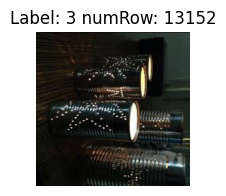

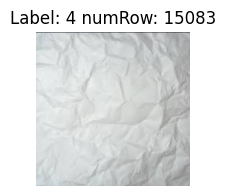

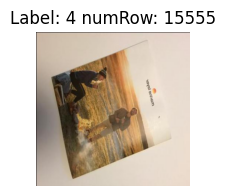

In [ ]:
import matplotlib.pyplot as plt
import random

for i in range(5):
    randomNum = random.randint(0, 19891)
    image = dataset["train"][randomNum]["image"]
    label = dataset["train"][randomNum]["label"]

    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f"Label: {label} numRow: {randomNum}")
    plt.axis("off")
    plt.show()

# Названия лейблов
0. biodegradable
1. cardboard
2. glass
3. metal
4. paper
5. plastic
6. trash (мусор без категории)


In [ ]:
import pandas as pd

df = dataset["train"].to_pandas()

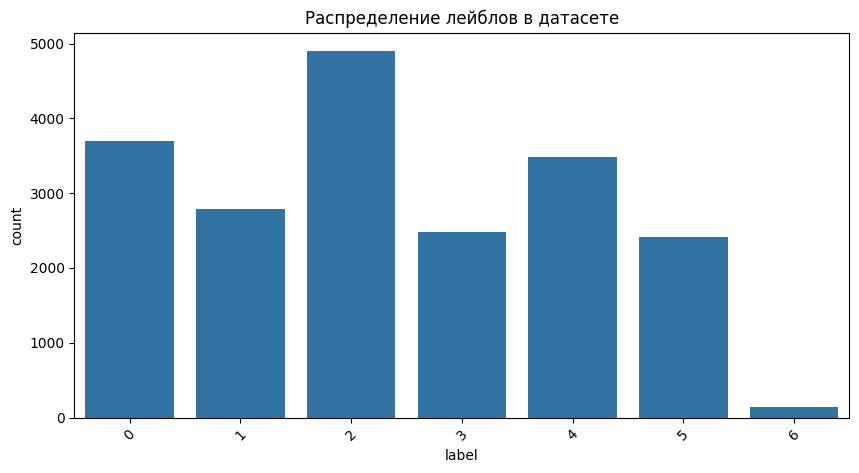

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df["label"])
plt.xticks(rotation=45)
plt.title("Распределение лейблов в датасете")
plt.show()

## Анализ размера изображений

              width        height
count  19892.000000  19892.000000
mean     861.308667    736.769757
std     1171.315912    843.974277
min      416.000000    416.000000
25%      416.000000    416.000000
50%      416.000000    416.000000
75%      416.000000    416.000000
max     4032.000000   3024.000000


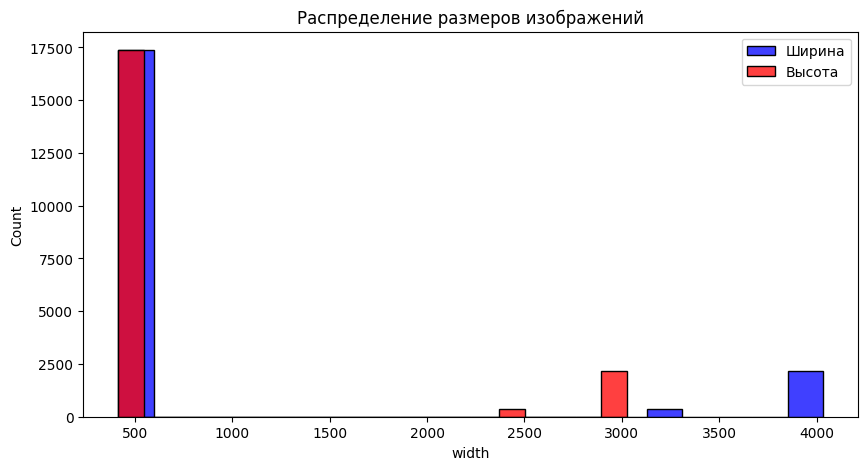

In [ ]:
from PIL import Image
from io import BytesIO

def get_image_size(img_dict):
    img = Image.open(BytesIO(img_dict["bytes"]))
    return img.size

df["width"], df["height"] = zip(*df["image"].apply(get_image_size))

print(df[["width", "height"]].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["width"], bins=20, color="blue", label="Ширина")
sns.histplot(df["height"], bins=20, color="red", label="Высота")
plt.legend()
plt.title("Распределение размеров изображений")
plt.show()


### Соотношение сторон в основном сосредоточенно в значениях 416 на 416. Есть выбросы

              * width        height
* count  19892.000000  19892.000000
* mean     861.308667    736.769757
* std     1171.315912    843.974277
* min      416.000000    416.000000
* 25%      416.000000    416.000000
* 50%      416.000000    416.000000
* 75%      416.000000    416.000000
* max     4032.000000   3024.000000

